# Image Generation

Before running this notebook, tou need to store your stability.ai API key in the environment variable `STABILITY_API_KEY`.

In [22]:
import os
import io
import requests
import IPython
from typing import Literal
from PIL import Image
from pathlib import Path
from gen_graphics import gen_image, gen_data_and_plot

In [23]:
def getenv_or_except(key: str) -> str:
    val = os.getenv(key)
    if val is None:
        raise KeyError(f"'{key}' not found in OS environment variables.")
    return val

In [24]:
gen_image(
    "melting",
    "View of a tall, pristine, white ice shelf with a huge chunk of ice falling and splashing into a deep blue ocean, photorealistic",
    aspect_ratio="16:9",
    output_format="png"
)

Sending REST request to https://api.stability.ai/v2beta/stable-image/generate/core...


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\aaron\\NTFS\\dev\\Apart_Sprint\\ai-gen-papers\\gfx\\gfx\\data\\melting.png'

In [3]:
def send_generation_request(
    host,
    params,
):
    headers = {
        "Accept": "image/*",
        "Authorization": f"Bearer {getenv_or_except('STABILITY_API_KEY')}"
    }

    # Encode parameters
    files = {}
    image = params.pop("image", None)
    mask = params.pop("mask", None)
    if image is not None and image != '':
        files["image"] = open(image, 'rb')
    if mask is not None and mask != '':
        files["mask"] = open(mask, 'rb')
    if len(files)==0:
        files["none"] = ''

    # Send request
    print(f"Sending REST request to {host}...")
    response = requests.post(
        host,
        headers=headers,
        files=files,
        data=params
    )
    if not response.ok:
        raise Exception(f"HTTP {response.status_code}: {response.text}")

    return response

In [4]:
name: str = "desertification_grid"
prompt: str = "2x2 grid of photos of desertification in various parts of the world, photorealistic" #@param {type:"string"}
negative_prompt = "" #@param {type:"string"}
aspect_ratio: Literal["21:9", "16:9", "3:2", "5:4", "1:1", "4:5", "2:3", "9:16", "9:21"] = "1:1" #@param ["21:9", "16:9", "3:2", "5:4", "1:1", "4:5", "2:3", "9:16", "9:21"]
seed = 0 #@param {type:"integer"}
output_format: Literal["webp", "jpeg", "png"] = "png" #@param ["webp", "jpeg", "png"]

host = f"https://api.stability.ai/v2beta/stable-image/generate/core"

params = {
    "prompt" : prompt,
    "negative_prompt" : negative_prompt,
    "aspect_ratio" : aspect_ratio,
    "seed" : seed,
    "output_format": output_format
}

# response = send_generation_request(
#     host,
#     params
# )

# Decode response
output_image = response.content
finish_reason = response.headers.get("finish-reason")
seed = response.headers.get("seed")

# Check for NSFW classification
if finish_reason == 'CONTENT_FILTERED':
    raise Warning("Generation failed NSFW classifier")

# Display result
PILimage: Image = Image.open(io.BytesIO(output_image))
IPython.display.display(PILimage)

# Save result
generated = Path("gfx")/"data"/f"IMG_{name}.{output_format}"
PILimage.save(generated, "PNG")
print(f"Saved image {generated}")

Sending REST request to https://api.stability.ai/v2beta/stable-image/generate/core...


FileNotFoundError: [Errno 2] No such file or directory: 'gfx\\images\\generated_1085265026.png'

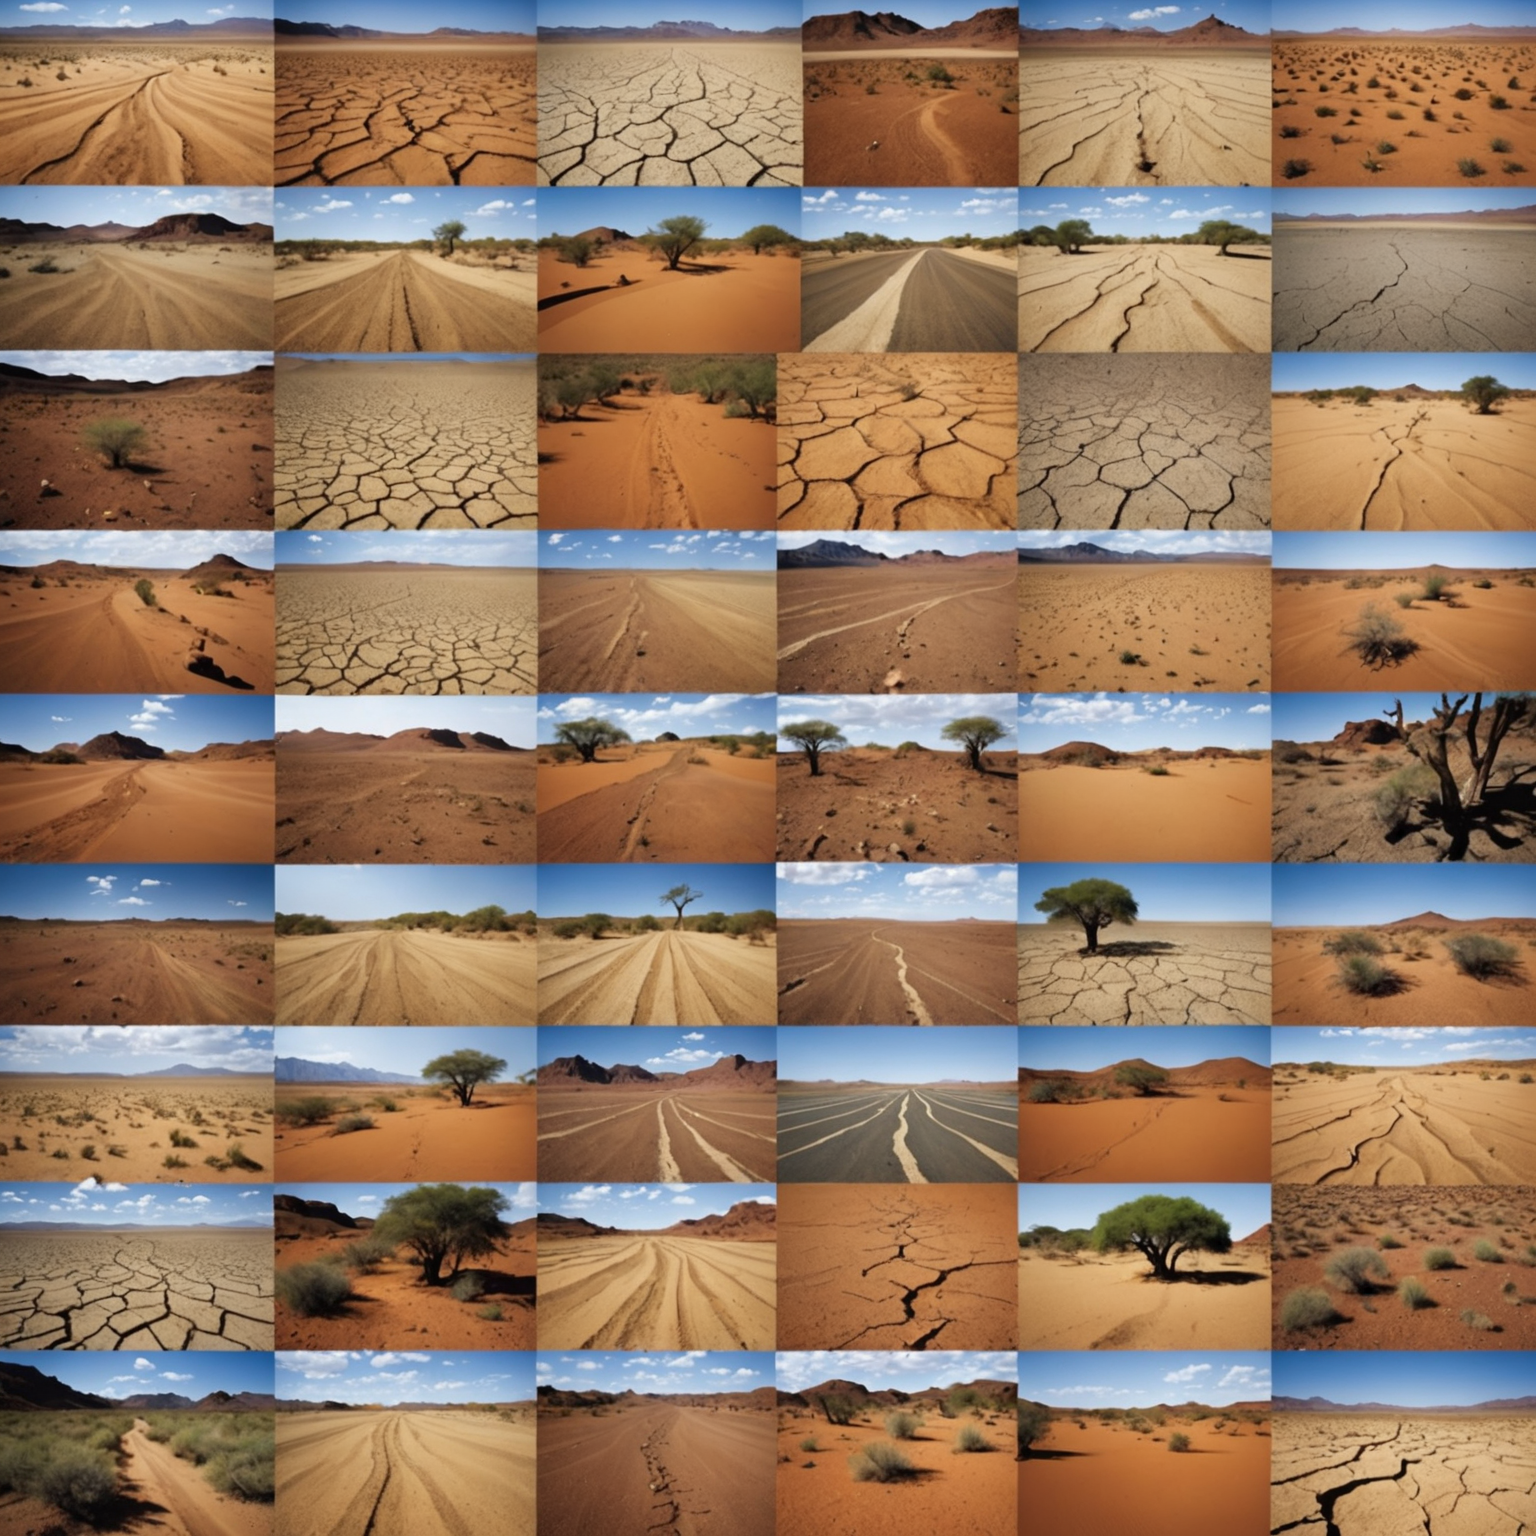

Saved image data\IMG_desertification.png


In [18]:
PILimage: Image = Image.open(io.BytesIO(output_image))
IPython.display.display(PILimage)

generated = Path("data")/f"IMG_{name}.{output_format}"
PILimage.save(generated, "PNG")
print(f"Saved image {generated}")